# **Project 3 Report**

Muhammed Ayaan Muhammed Moinuddin

CS658

**P3-1. Revisit Text Documents Classification** 

Use the 20 newsgroups dataset embedded in scikit-learn:
from sklearn.datasets import fetch_20newsgroups 

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].**


In [1]:
# Import the required libraries
from sklearn.datasets import fetch_20newsgroups

# Specify the categories to load
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# Fetch the 20 newsgroups dataset with the selected categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

The code loads a specific subset of the 20 newsgroups dataset, which comprises a collection of newsgroup documents. This subset is tailored to the selected categories, preparing it for further analysis.

**(b) Build classifiers using the following methods:**
    
    
• Support Vector Machine (sklearn.svm.LinearSVC)

• Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)

• K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)

• Random forest (sklearn.ensemble.RandomForestClassifier)

• AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)

Compare the classification accuracy of these methods.

In [2]:
# Import the required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Split the text data and labels into training and testing subsets
X = newsgroups.data  # Access the list of text documents
y = newsgroups.target  # Access the list of labels (0, 1, 2, 3 for specified categories)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train different classifiers
classifiers = {
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

results = {}

# Train each classifier and evaluate their accuracy
for clf_name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = accuracy

# Display the classification accuracy for each classifier
for clf_name, accuracy in results.items():
    print(f"{clf_name} Accuracy: {accuracy:.4f}")


/Users/ayaan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC Accuracy: 0.9902
MultinomialNB Accuracy: 0.9581
KNeighborsClassifier Accuracy: 0.9232
RandomForestClassifier Accuracy: 0.9204
AdaBoostClassifier Accuracy: 0.8212


The code performs text classification on the 20 newsgroups dataset using  Support Vector Machine, Naive Bayes classifiers, K-nearest neighbors, Random forest, AdaBoost classifier and it actively reports their classification accuracies.

**P3-2. Recognizing hand-written digits** 

Use the hand-written digits dataset embedded in scikit-learn:
from sklearn import datasets digits = datasets.load_digits()

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits with the classification accuracy larger than 90%. To build your classifier, you can use:
sklearn.neural_network.MLPClassifier**



In [3]:
# Import the required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the hand-written digits dataset
digits = datasets.load_digits()

# Split the dataset into training and testing subsets
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create an MLPClassifier and train it on the training data
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and assess the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy of the classifier
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


The code loads, splits, trains, and evaluates an MLP-based classifier for recognizing hand-written digits, reporting its classification accuracy.

**(b) Show the confusion matrix of your neural network. Discuss and compare your results with the results using a support vector classifier**

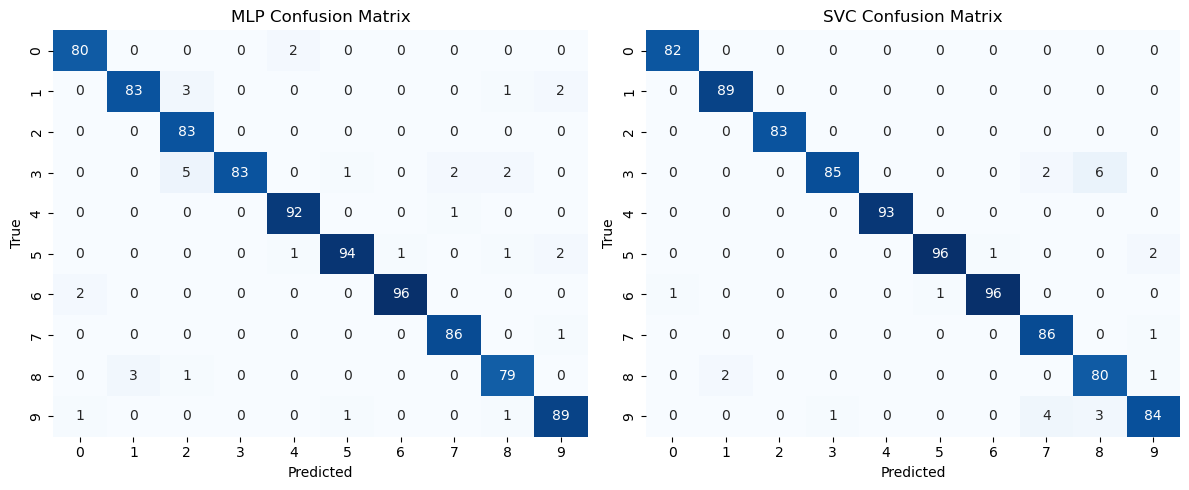

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        82
           1       0.97      0.93      0.95        89
           2       0.90      1.00      0.95        83
           3       1.00      0.89      0.94        93
           4       0.97      0.99      0.98        93
           5       0.98      0.95      0.96        99
           6       0.99      0.98      0.98        98
           7       0.97      0.99      0.98        87
           8       0.94      0.95      0.95        83
           9       0.95      0.97      0.96        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.98      1.00      0.99        89
           2       1.0

In [4]:
# Import the required libraries
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Load the hand-written digits dataset
digits = datasets.load_digits()

# Split the dataset into training and testing subsets
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and train an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Create and train a Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Predict on the test data for both classifiers
y_pred_mlp = mlp.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Calculate confusion matrices for both classifiers
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Visualize the confusion matrices using a heatmap
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

# Classification reports for both classifiers
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

The code evaluates the performance of two classifiers (MLP and SVC) on the hand-written digits dataset by generating confusion matrices and classification reports, providing insights into their classification abilities.

**P3-3. Nonlinear Support Vector Machine** 

**(a) Randomly generate the following 2-class data points**

import numpy as np

np.random.seed(0)

X = np.random.rand(300, 2)*10-5

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [5]:
# Import the required libraries
import numpy as np
# Set a random seed for reproducibility
np.random.seed(0)

# Generate the 2-class data points
X = np.random.rand(300, 2) * 10 - 5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

The code creates a synthetic dataset of 300 2D data points with corresponding binary labels based on the XOR operation between the two features. The random seed is set to ensure the same data is generated every time you run the code.

**(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

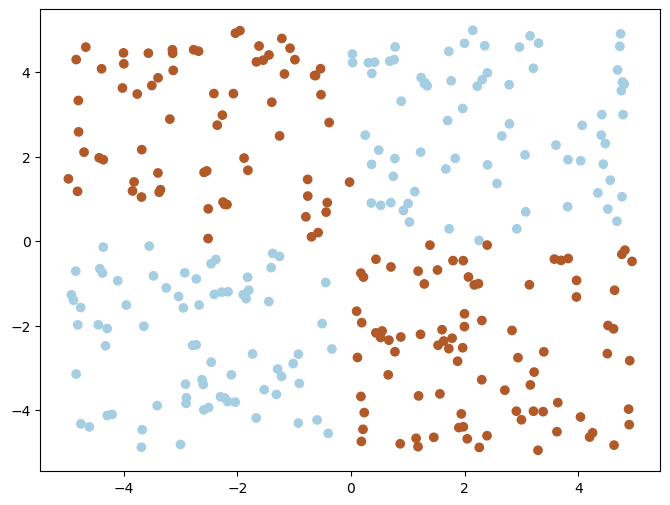

In [6]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC

# Create and train a nonlinear SVM binary classifier (NuSVC)
svm = NuSVC(kernel='poly', degree=2) 
svm.fit(X, Y)

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

The code initializes a NuSVC classifier with a polynomial kernel of degree 2 and train it using the generated data. Then we visualize the data points on a scatter plot, with the points colored according to their binary labels, and a decision boundary is plotted to separate the two classes. This code demonstrates the training and visualization of a Nonlinear SVM classifier for binary classification on the generated dataset.

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

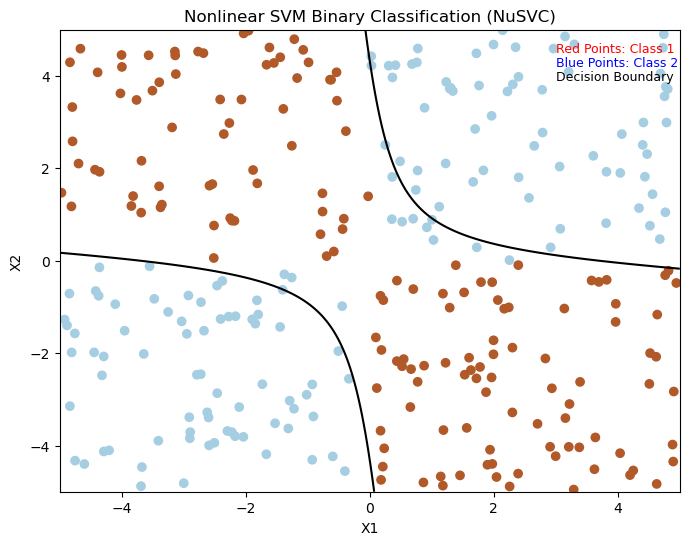

In [7]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nonlinear SVM Binary Classification (NuSVC)')

# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Compute the decision function values for each point in the meshgrid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using contour lines at level 0
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles=['-'])

# Add labels in the top corner to explain the plot
plt.text(3, 4.5, 'Red Points: Class 1', color='red', fontsize=9)
plt.text(3, 4.2, 'Blue Points: Class 2', color='blue', fontsize=9)
plt.text(3, 3.9, 'Decision Boundary', color='black', fontsize=9)

# Display the plot
plt.show()

**Support Vector Machine (SVM) with Polynomial Kernel**

The code implements a binary classification task using the Nu-Support Vector Classification (NuSVC) algorithm with a polynomial kernel. This SVM variant is employed to handle nonlinearity in the dataset, allowing for a more complex decision boundary.

**Dataset Generation**

A dataset is generated, consisting of 300 data points. Each data point has two features (X1 and X2), and these features are distributed within the range of -5 to 5. Class labels are assigned based on a logical XOR relationship between the features, introducing a nonlinear separation between the two classes.

**NuSVC Model Training**

The NuSVC model is instantiated with a polynomial kernel of degree 2, suggesting a quadratic decision boundary. The model is then trained on the generated dataset using the fit method, adapting to the nonlinear relationships within the data.

**Visualization through Scatter Plot**

A scatter plot is created to visualize the distribution of data points in the two-dimensional feature space. Different classes are distinguished by color, providing an intuitive representation of the dataset. Axes are labeled, and a title is added to enhance clarity.

**Illustrating the Decision Boundary**

To visualize the decision boundary learned by the NuSVC model, a meshgrid is generated, covering the same range as the dataset. Decision function values are computed for each point in the meshgrid, and contour lines are plotted, representing the decision boundary at the zero level.